In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [35]:
input_path = []
label = []

for class_name in os.listdir("/kaggle/input/dataset"):
    for path in os.listdir("/kaggle/input/dataset/"+class_name):
        if class_name == 'no':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("/kaggle/input/dataset", class_name, path))
print(input_path[0], label[0])

/kaggle/input/dataset/no/34 no.jpg 0


In [36]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head(200)

,images,label
0,/kaggle/input/dataset/yes/Y73.jpg,1
1,/kaggle/input/dataset/yes/Y184.JPG,1
2,/kaggle/input/dataset/no/no 7.jpeg,0
3,/kaggle/input/dataset/no/14 no.jpg,0
4,/kaggle/input/dataset/yes/Y105.jpg,1
...,...,...
195,/kaggle/input/dataset/yes/Y258.JPG,1
196,/kaggle/input/dataset/yes/Y29.jpg,1
197,/kaggle/input/dataset/no/28 no.jpg,0
198,/kaggle/input/dataset/yes/Y168.jpg,1


In [37]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

/kaggle/input/dataset/yes/Y184.JPG
/kaggle/input/dataset/no/no 7.jpeg
/kaggle/input/dataset/yes/Y59.JPG
/kaggle/input/dataset/yes/Y66.JPG
/kaggle/input/dataset/yes/Y146.JPG
/kaggle/input/dataset/yes/Y247.JPG
/kaggle/input/dataset/yes/Y256.JPG
/kaggle/input/dataset/yes/Y58.JPG
/kaggle/input/dataset/yes/Y75.JPG
/kaggle/input/dataset/yes/Y166.JPG
/kaggle/input/dataset/no/no 9.png
/kaggle/input/dataset/yes/Y155.JPG
/kaggle/input/dataset/no/48 no.jpeg
/kaggle/input/dataset/no/N20.JPG
/kaggle/input/dataset/yes/Y251.JPG
/kaggle/input/dataset/yes/Y19.JPG
/kaggle/input/dataset/no/no 5.jpeg
/kaggle/input/dataset/yes/Y44.JPG
/kaggle/input/dataset/yes/Y156.JPG
/kaggle/input/dataset/yes/Y244.JPG
/kaggle/input/dataset/yes/Y16.JPG
/kaggle/input/dataset/yes/Y92.png
/kaggle/input/dataset/no/no 91.jpeg
/kaggle/input/dataset/yes/Y112.JPG
/kaggle/input/dataset/yes/Y253.JPG
/kaggle/input/dataset/yes/Y47.JPG
/kaggle/input/dataset/yes/Y98.JPG
/kaggle/input/dataset/yes/Y148.JPG
/kaggle/input/dataset/yes/Y18.J

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('yes')
    plt.axis('off')

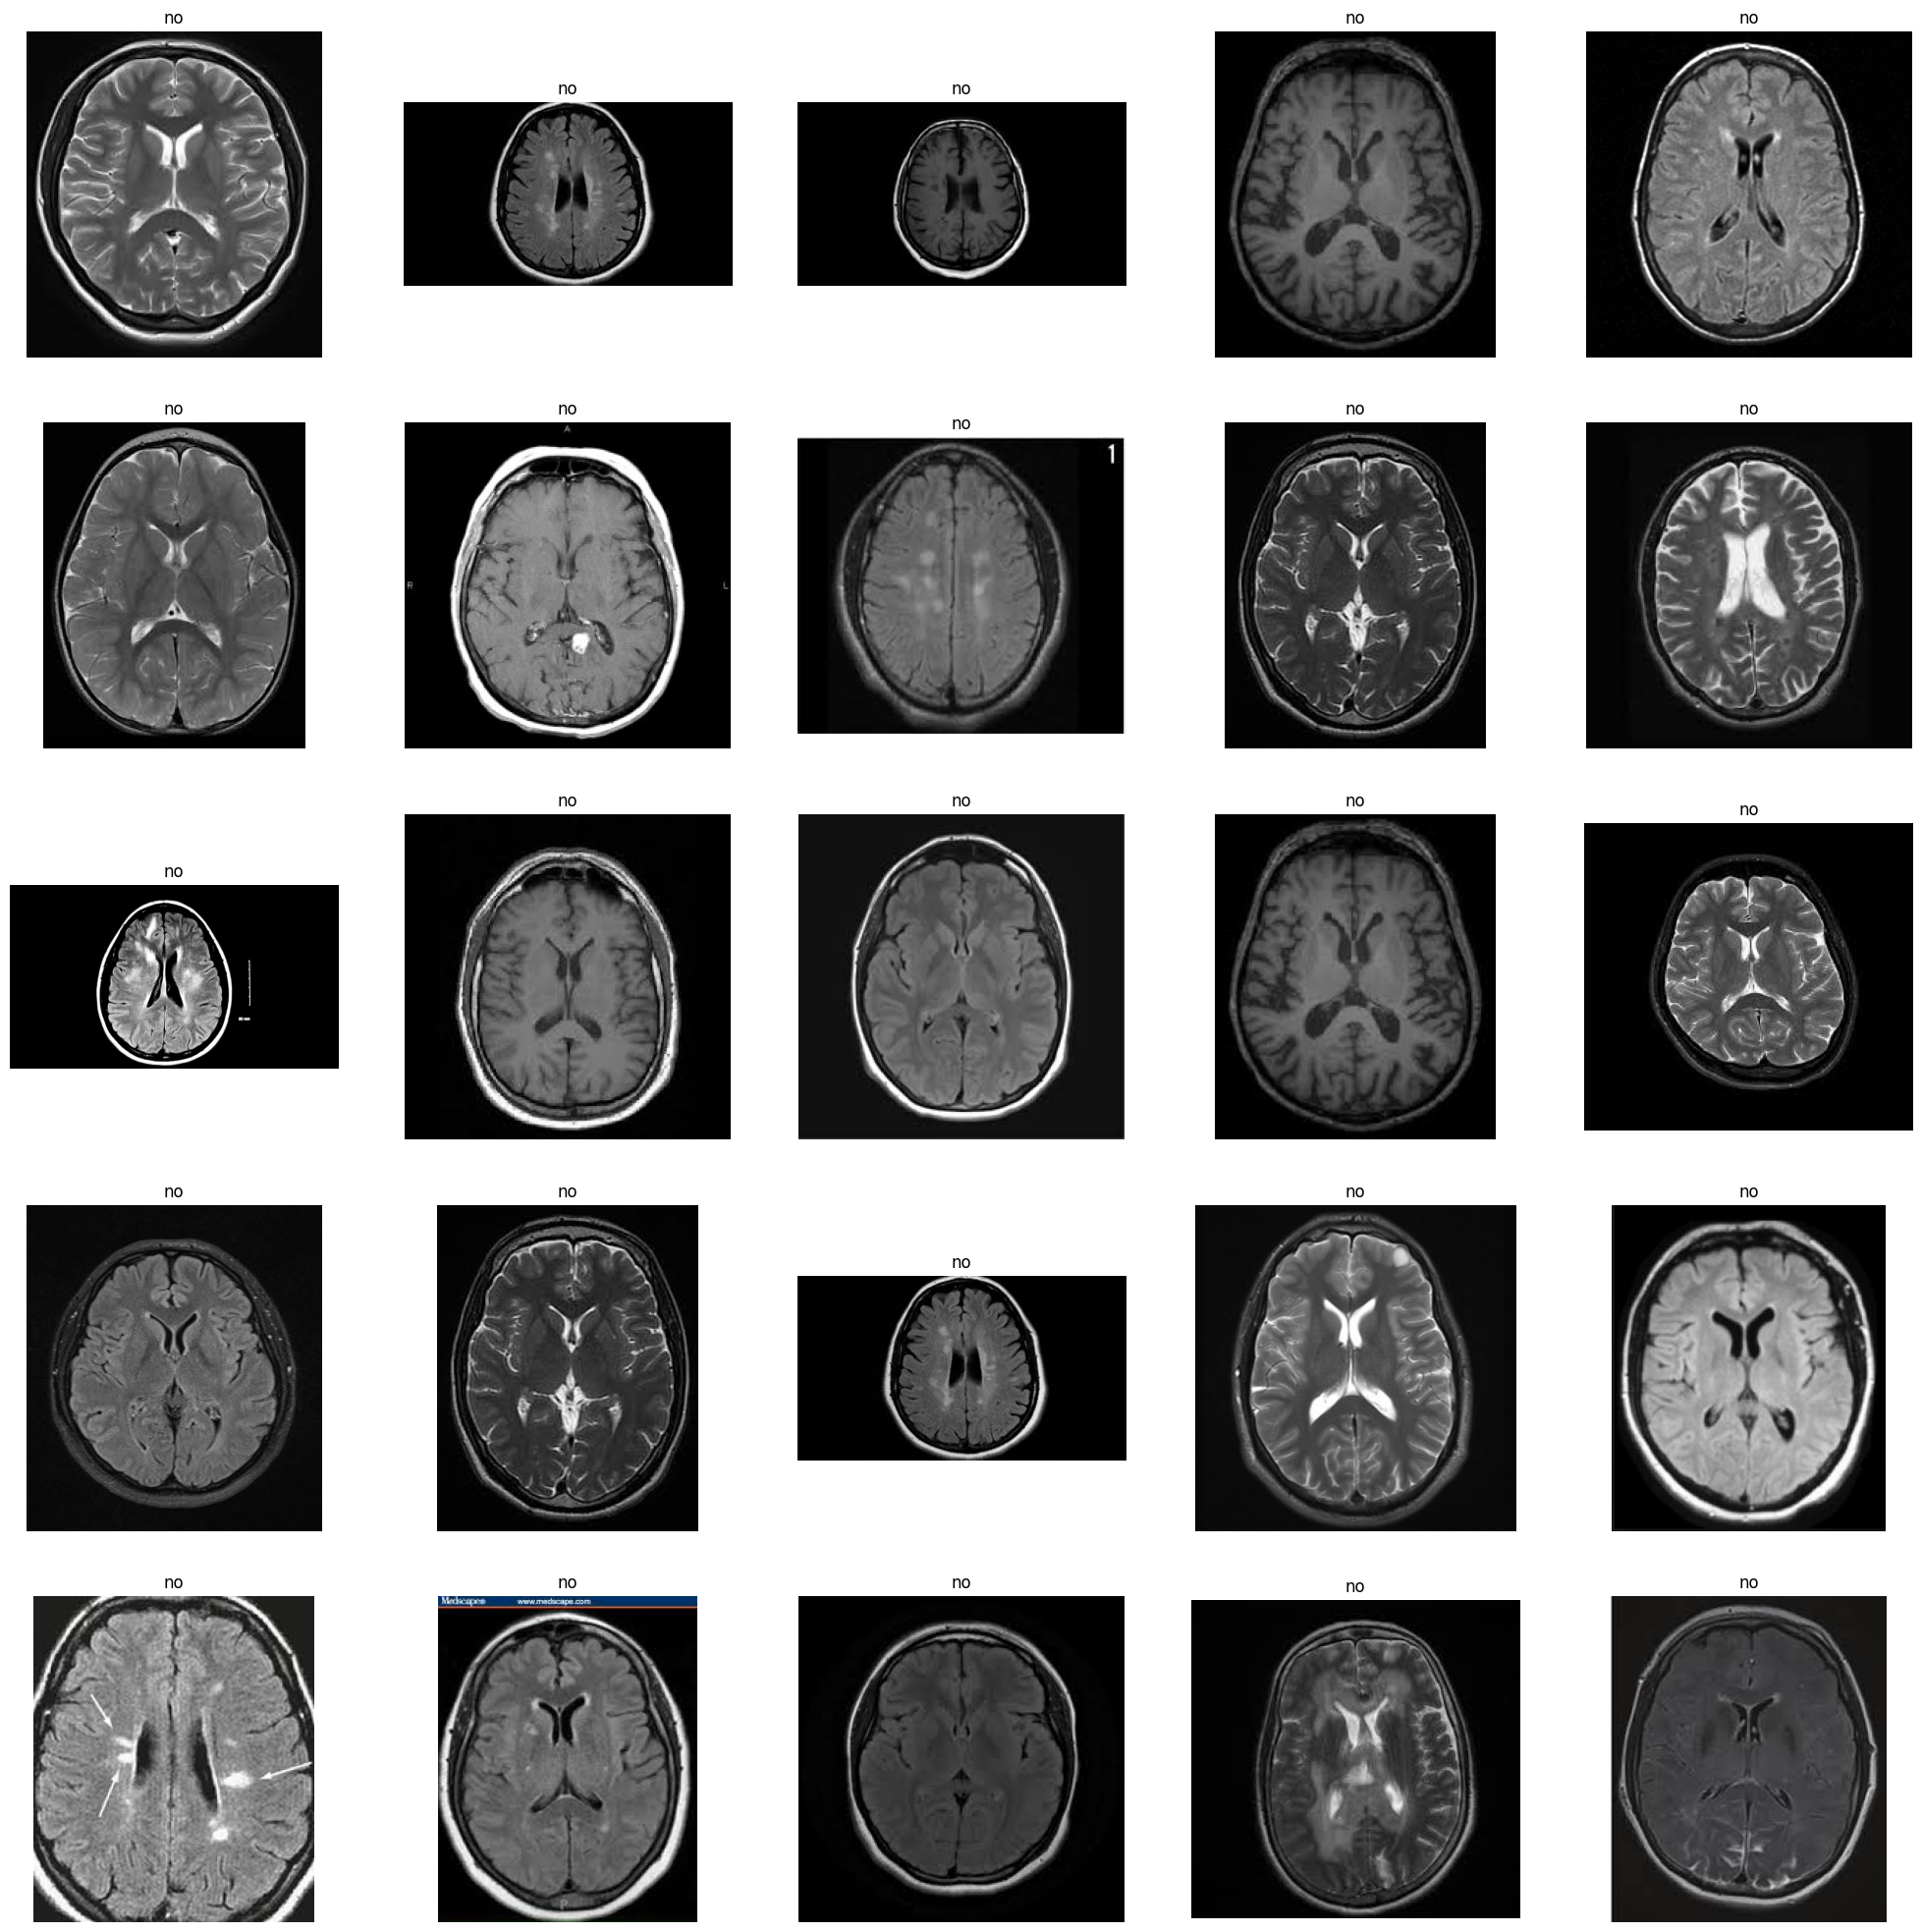

In [14]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('no')
    plt.axis('off')

In [18]:
df['label'] = df['label'].astype('str')
df.head()

,images,label
0,/kaggle/input/dataset/yes/Y107.jpg,1
1,/kaggle/input/dataset/no/N19.JPG,0
2,/kaggle/input/dataset/yes/Y170.JPG,1
3,/kaggle/input/dataset/yes/Y15.jpg,1
4,/kaggle/input/dataset/yes/Y54.jpg,1


In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=42)

In [22]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 189 validated image filenames belonging to 2 classes.
Found 64 validated image filenames belonging to 2 classes.


In [24]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)       

In [25]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)


Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.6950 - accuracy: 0.4392 - val_loss: 1.0003 - val_accuracy: 0.6719
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 1.1024 - accuracy: 0.5926 - val_loss: 0.5693 - val_accuracy: 0.7812
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 0.6250 - accuracy: 0.6984 - val_loss: 0.7331 - val_accuracy: 0.3906
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.7193 - accuracy: 0.4339 - val_loss: 0.6494 - val_accuracy: 0.6250
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.6582 - accuracy: 0.6296 - val_loss: 0.5718 - val_accuracy: 0.7969
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.6266 - accuracy: 0.6561 - val_loss: 0.5396 - val_accuracy: 0.7812
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.6048 - accuracy: 0.7302 - val_loss: 0.5261 - val_accuracy: 0.7344
Epoch 8/10
1/1 [=========================

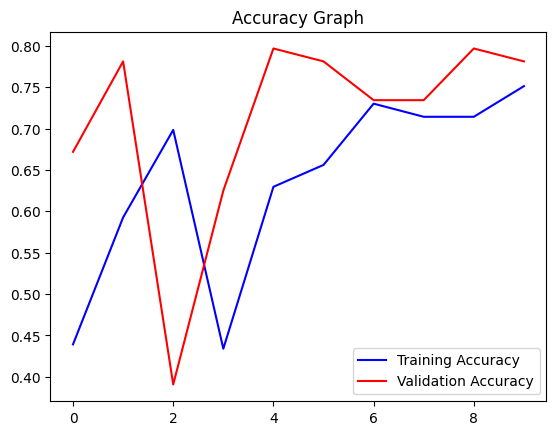

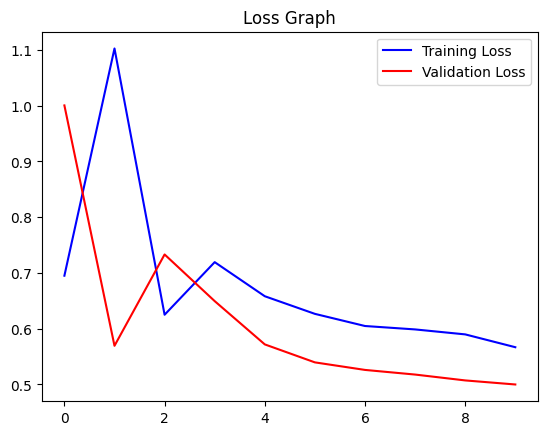

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()


In [28]:
image_path = "/kaggle/input/dataset/yes/Y101.jpg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'yes'
else:
    label = 'no'
print(label)

1/1 [==============================] - 0s 133ms/step
yes


1/1 [==============================] - 0s 391ms/step


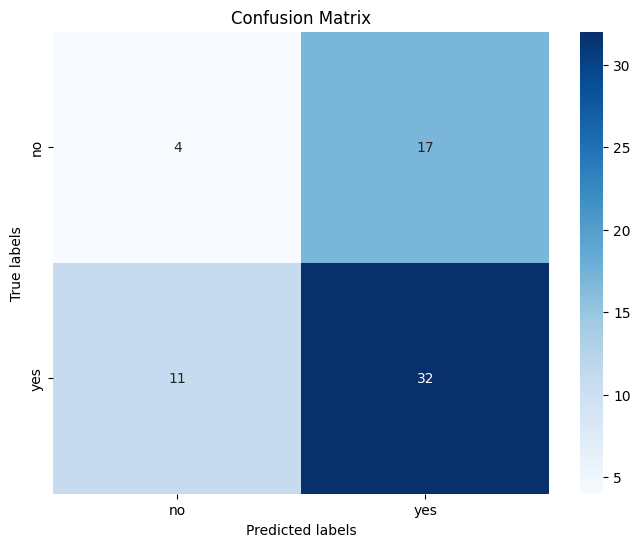

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


test_predictions = model.predict(val_iterator)
test_predictions = (test_predictions > 0.5).astype(int) 

y_true = val_iterator.classes


cm = confusion_matrix(y_true, test_predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [30]:
from sklearn.metrics import classification_report


class_report = classification_report(y_true, test_predictions, target_names=['no', 'yes'])

print(class_report)

              precision    recall  f1-score   support

          no       0.27      0.19      0.22        21
         yes       0.65      0.74      0.70        43

    accuracy                           0.56        64
   macro avg       0.46      0.47      0.46        64
weighted avg       0.53      0.56      0.54        64

